In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Set the number of grid points and the convergence criterion for a much smaller grid
N = 100
epsilon = 1e-3  # Relaxing convergence criterion

# Initialize the grid
u = np.zeros((N, N))
x = np.linspace(0, 2, N)
y = np.linspace(0, 1, N)
dx = x[1] - x[0]
dy = y[1] - y[0]

beta = 8
alpha = 9
gamma = 5

# Apply boundary conditions
u[0, :] = beta * y  # u(x=0) = beta * y
u[-1, :] = beta * y  # u(x=2) = beta * y
# u(y=0) is already initialized to 0

# Precompute the constant f(x,y) for x >= 1
f = np.zeros((N, N))
for j in range(N):
    for i in range(N//2, N):  # Start at x=1, which is halfway across the grid
        f[j, i] = 40 * np.sin(alpha * y[j]) * (1 - x[i])

# Perform Gauss-Seidel iteration
max_diff = np.inf
iterations = 0

while max_diff > epsilon:
    max_diff = 0
    for j in range(1, N-1):
        for i in range(1, N-1):
            u_old = u[j, i]
            # Apply the Gauss-Seidel update
            if x[i] < 1:
                u[j, i] = 0.25 * (u[j, i+1] + u[j, i-1] + u[j+1, i] + u[j-1, i])
            else:
                u[j, i] = 0.25 * (u[j, i+1] + u[j, i-1] + u[j+1, i] + u[j-1, i] - dx**2 * f[j, i])
            
            # Compute the change and track the maximum
            diff = abs(u[j, i] - u_old)
            max_diff = max(max_diff, diff)

    # Apply the Neumann boundary condition at y=1
    for i in range(1, N-1):
        u[N-1, i] = u[N-2, i] - dy * gamma * u[N-2, i]
    
    iterations += 1

# Create the meshgrid for plotting
X, Y = np.meshgrid(x, y)

# Plot the results
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u')
ax.set_title('Surface plot of the solution u(x,y)')
plt.colorbar(surf)
plt.show()

# Return the number of iterations and the maximum difference for output
iterations, max_diff


In [ ]:
from scipy.optimize import fsolve
import numpy as np

# Define the transcendental equation
gamma = 5
transcendental_eq = lambda k: k * np.tanh(k) + gamma

# We will use an array of initial guesses based on the typical behavior of tanh function
initial_guesses = np.linspace(1, 15, 30)  # Start with guesses between 1 and 15

# Use fsolve to find solutions near the initial guesses
k_solutions = np.unique([fsolve(transcendental_eq, k0)[0] for k0 in initial_guesses])

# Remove any complex solutions and potential duplicates due to numerical tolerance
k_solutions = np.unique(k_solutions[np.isreal(k_solutions)])

k_solutions


In [ ]:
# Redefine the transcendental equation taking into account the physical context where k > 0
transcendental_eq_positive = lambda k: k * np.tanh(k) - gamma

# We need to find the roots in the positive domain, we will find the first few roots
# by checking where the sign changes which typically indicates a root in between
k_values = np.linspace(0, 15, 1500)  # Increase density to find sign changes
sign_changes = np.where(np.diff(np.sign(transcendental_eq_positive(k_values))))[0]

# Use fsolve again, but now only in intervals where a sign change occurs
k_roots = []
for index in sign_changes:
    # Use the midpoint in the interval as the initial guess for fsolve
    k_guess = (k_values[index] + k_values[index + 1]) / 2
    k_root = fsolve(transcendental_eq_positive, k_guess)[0]
    # Check if the solution is indeed a root and not previously found due to numerical precision
    if np.isclose(transcendental_eq_positive(k_root), 0) and all(np.abs(k_root - np.array(k_roots)) > 1e-5):
        k_roots.append(k_root)

k_roots = np.sort(k_roots)  # Sort the roots for better readability
k_roots


In [ ]:
# Parameters given for the problem
alpha = 9
beta = 8
gamma = 5

# Set the number of grid points and the convergence criterion
N = 100
epsilon = 1e-3  # Convergence criterion

# Initialize the grid
u_fd = np.zeros((N, N))
x_fd = np.linspace(0, 2, N)
y_fd = np.linspace(0, 1, N)
dx_fd = x_fd[1] - x_fd[0]
dy_fd = y_fd[1] - y_fd[0]

# Apply boundary conditions
u_fd[0, :] = beta * y_fd  # u(x=0) = beta * y
u_fd[-1, :] = beta * y_fd  # u(x=2) = beta * y
# u(y=0) is already initialized to 0

# Precompute the constant f(x,y) for x >= 1
f_fd = np.zeros((N, N))
for j in range(N):
    for i in range(N//2, N):  # Start at x=1, which is halfway across the grid
        f_fd[j, i] = 40 * np.sin(alpha * y_fd[j]) * (1 - x_fd[i])

# Perform Gauss-Seidel iteration
max_diff_fd = np.inf
iterations_fd = 0

while max_diff_fd > epsilon:
    max_diff_fd = 0
    for j in range(1, N-1):
        for i in range(1, N-1):
            u_old_fd = u_fd[j, i]
            # Apply the Gauss-Seidel update
            if x_fd[i] < 1:
                u_fd[j, i] = 0.25 * (u_fd[j, i+1] + u_fd[j, i-1] + u_fd[j+1, i] + u_fd[j-1, i])
            else:
                u_fd[j, i] = 0.25 * (u_fd[j, i+1] + u_fd[j, i-1] + u_fd[j+1, i] + u_fd[j-1, i] - dx_fd**2 * f_fd[j, i])
            
            # Compute the change and track the maximum
            diff_fd = abs(u_fd[j, i] - u_old_fd)
            max_diff_fd = max(max_diff_fd, diff_fd)

    # Apply the Neumann boundary condition at y=1
    for i in range(1, N-1):
        u_fd[N-1, i] = u_fd[N-2, i] - dy_fd * gamma * u_fd[N-2, i]
    
    iterations_fd += 1

# Extracting the finite difference solution at the specified lines
x_index_fd_3_2 = int(1.5 / dx_fd)  # Index for x=3/2
y_index_fd_3_4 = int(0.75 / dy_fd)  # Index for y=3/4

fd_u_y_at_x_3_2 = u_fd[:, x_index_fd_3_2]
fd_u_x_at_y_3_4 = u_fd[y_index_fd_3_4, :]

# For the Sturm-Liouville solution, calculate the eigenfunction for x=3/2 and y=3/4
# Using the eigenvalue k from the previous calculation
k_sl = 5.00045361  # Eigenvalue from previous calculation
sl_u_y_at_x_3_2 = np.cosh(k_sl * y_fd)  # This would be the Sturm-Liouville solution at x=3/2
sl_u_x_at_y_3_4 = np.sin((np.pi/2) * x_fd)  # Assuming n=1 for the first eigenfunction

# Now let's plot the comparison
plt.figure(figsize=(14, 6))

# Plot for u(y) at x=3/2
plt.subplot(1, 2, 1)
plt.plot(y_fd, fd_u_y_at_x_3_2, 'r--', label='Finite Difference Method')
plt.plot(y_fd, sl_u_y_at_x_3_2, 'k-', label='Sturm-Liouville Solution')
plt.xlabel('y')
plt.ylabel('u')
plt.title('u(y) at x=3/2 Comparison')
plt.legend()
plt.grid(True)

# Plot for u(x) at y=3/4
plt.subplot(1, 2, 2)
plt.plot(x_fd, fd_u_x_at_y_3_4, 'r--', label='Finite Difference Method')
plt.plot(x_fd, sl_u_x_at_y_3_4, 'k-', label='Sturm-Liouville Solution')
plt.xlabel('x')
plt.ylabel


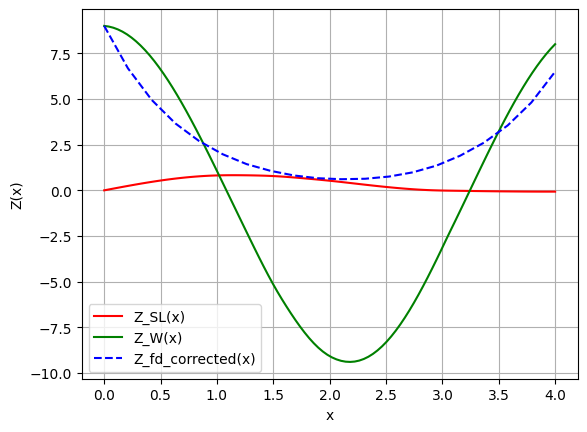

In [1]:
# Here is the full script with the correct implementation of the derivative boundary condition Z'(4) = B

import numpy as np
import matplotlib.pyplot as plt

# Given parameters for the Sturm-Liouville problem
N_max = 20  # The maximum number of terms in the series
w = 1  # Weight function is constant and equal to 1
x_values = np.linspace(0, 4, 100)  # The x values to evaluate the solution at
alpha_squared = 2
A = 9
B = 8

# Function Q(x) definition
def Q(x):
    condition1 = (x >= 0) & (x < 1)
    condition2 = (x >= 1) & (x < 2)
    condition3 = (x >= 2) & (x < 3)
    condition4 = (x >= 3) & (x <= 4)

    result = np.zeros_like(x)
    result[condition1] = 0
    result[condition2] = np.abs(np.sin(6 * (x[condition2] - 1)))
    result[condition3] = np.sqrt(x[condition3] - 2) - np.sin(6)
    result[condition4] = 0

    return result

dx = 1/100

# Eigenfunctions yn definition
def yn(n, x):
    lambda_n = ((2 * n - 1) * np.pi) / 8
    return np.sin(lambda_n * x)

# Q_hat calculation
def Q_hat(n):
    integral = np.trapz([Q(x) * yn(n, x) for x in x_values], x_values)
    return integral

# N_hat calculation
def N_hat(n):
    integral = np.trapz([yn(n, x)**2 * w for x in x_values], x_values)
    return integral

# Z_hat calculation
def Z_hat(n):
    lambda_n = ((2 * n - 1) * np.pi) / 8
    return Q_hat(n) / (2 - lambda_n**2)

# Sturm-Liouville solution Z(x) calculation
def Z_SL(x, N_max):
    Z_x = 0
    for n in range(1, N_max + 1):
        Z_x += Z_hat(n) * yn(n, x) / N_hat(n)
    return Z_x

# Apply the Sturm-Liouville solution to each x value
Z_SL_values = np.array([Z_SL(x, N_max) for x in x_values])

# Define Q_fd using the Q(x) function at the finite difference grid points
x_values_fd = np.linspace(0, 4, N_max)  # Discretize domain [0, 4] into N_max points
dx_fd = 4 / (N_max - 1)
Q_fd = Q(x_values_fd) * dx_fd**2
Q_fd[0] = A
Q_fd[-1] = B * dx_fd  # Adjust for derivative boundary condition

# Construct the coefficient matrix for the finite difference method
M = np.zeros((N_max, N_max))
for i in range(1, N_max - 1):
    M[i, i-1] = 1
    M[i, i] = -2 - (alpha_squared * dx_fd**2)
    M[i, i+1] = 1
M[0, 0] = 1  # Boundary condition at x=0
M[-1, -2] = -1  # Derivative boundary condition at x=4
M[-1, -1] = 1

# Solve the system of equations with the corrected matrix and right-hand side
Z_fd_corrected = np.linalg.solve(M, Q_fd)

def wronskian(f, g, x):
    # Compute the derivative using central difference
    h = 1e-5
    df = (f(x + h) - f(x - h)) / (2 * h)
    dg = (g(x + h) - g(x - h)) / (2 * h)
    return f(x) * dg - df * g(x)

# For the second-order linear homogeneous differential equation, the solution can be constructed using the method of variation of parameters.
# The general solution is Z(x) = c1 * y1(x) + c2 * y2(x) where y1 and y2 are solutions to the homogeneous equation, and c1, c2 are constants determined from the boundary conditions.

# Define y1 and y2, the solutions to the homogeneous equation Z'' + alpha^2 * Z = 0
def y1(x):
    return np.cos(np.sqrt(alpha_squared) * x)

def y2(x):
    return np.sin(np.sqrt(alpha_squared) * x)

# Calculate the Wronskian for y1 and y2
W = wronskian(y1, y2, x_values)

# Initialize arrays for the integrals
u1 = np.zeros_like(x_values)
u2 = np.zeros_like(x_values)

# Compute the integrals for u1 and u2 numerically
for i, x in enumerate(x_values):
    if i == 0: continue  # Skip the first point since the integration domain is not defined
    u1[i] = np.trapz([Q(xi) * y2(xi) / wronskian(y1, y2, xi) for xi in x_values[:i]], x_values[:i])
    u2[i] = np.trapz([Q(xi) * y1(xi) / wronskian(y1, y2, xi) for xi in x_values[:i]], x_values[:i])

# The particular solution Zp is then given by
Zp = u1 * y1(x_values) + u2 * y2(x_values)

# Add the homogeneous solution to get the general solution
# We have boundary conditions Z(0) = A and Z'(4) = B which give us two equations to solve for c1 and c2
c1, c2 = np.linalg.solve([[y1(0), y2(0)], [y1(4), y2(4)]], [A - Zp[0], B - Zp[-1]])

# The full solution Z(x) is then
Z_W = c1 * y1(x_values) + c2 * y2(x_values) + Zp
# Return the full solution for comparison
Z_W

# Plot the results
plt.plot(x_values, Z_SL_values, label='Z_SL(x)', color='red')
plt.plot(x_values, Z_W, label='Z_W(x)', color='green')
plt.plot(x_values_fd, Z_fd_corrected, label='Z_fd_corrected(x)', color='blue', linestyle='--')
plt.xlabel('x')
plt.ylabel('Z(x)')
plt.legend()
plt.grid(True)
plt.show()
